The project aims to explore the unemployment reasons for two organizations DETE and TAFE using Employee Exit Surveys.

In [31]:
import pandas as pd
import numpy as np

#reading the data into pandas
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

#examining the data for dete
dete_survey.info()

dete_survey.head(10)

dete_survey['SeparationType'].value_counts()







<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

In [32]:
#examining data for tafe survey
tafe_survey.info()

tafe_survey.head(15)

tafe_survey['Reason for ceasing employment'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dtype: int64

The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.

Both the dete_survey and tafe_survey contain many columns that we don't need to complete our analysis.

Each dataframe contains many of the same columns, but the column names are different.

There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

In [33]:
#setting not stated values as NaN in dete survey
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')

In [34]:
#dropping unwanted columns from dete

dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

columns that do not contribute to our analysis of reasons for employee exit were removed.

In [35]:
#renaming columns in dete
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.replace(' ', '_').str.strip()
print(dete_survey_updated.head(5))

#updating column names in tafe
tafe_survey_updated = tafe_survey.rename(columns = {'CESSATION YEAR':'cease_date', 'Record ID':'id', 'Reason for ceasing employment':'separationtype', 'Gender. What is your Gender?':'gender','Employment Type. Employment Type':'employment_status', 'Classification. Classification': 'position','LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'})

   id                    separationtype cease_date  dete_start_date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   
3   4         Resignation-Other reasons    05/2012           2005.0   
4   5                    Age Retirement    05/2012           1970.0   

   role_start_date                                      position  \
0           2004.0                                Public Servant   
1              NaN                                Public Servant   
2           2011.0                               Schools Officer   
3           2006.0                                       Teacher   
4           1989.0  Head of Curriculum/Head of Special Education   

  classification              region                      business_unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-A

In [36]:
tafe_survey_updated.head()

id                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   

                   WorkArea  cease_date    separationtype  \
0  Non-Delivery (corporate)      2010.0  Contract Expired   
1  Non-Delivery (corporate)      2010.0        Retirement   
2       Delivery (teaching)      2010.0        Retirement   
3  Non-Delivery (corporate)      2010.0       Resignation   
4       Delivery (teaching)      2010.0       Resignation   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                  -   
2                                                  -   
3                                                  -   
4                                                  -   

  Contributing Factors. Career Move - Private Sector   \
0                                                NaN    
1                                                  -    
2                                                  -    
3                                                  -    
4                       Career Move - Private Sector    

  Contributing Factors. Career Move - Self-employment  \
0                                                NaN    
1                                                  -    
2                                                  -    
3                                                  -    
4                                                  -    

  Contributing Factors. Ill Health Contributing Factors. Maternity/Family  \
0                              NaN                                    NaN   
1                                -                                      -   
2                                -                                      -   
3                                -                                      -   
4                                -                                      -   

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

  Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?  \
0                                                Yes                                                            
1                                                Yes                                                            
2                                                Yes                                                            
3                                                Yes                                                            
4                                                Yes                                                            

  Workplace. Topic:Does your workplace promote and practice the principles of employment equity?  \
0                                                Yes                                               
1                                                Yes                                               
2                                                Yes                                               
3                                                Yes                                               
4                                                Yes                                               

  Workplace. Topic:Does your workplace value the diversity of its employees?  \
0                                                Yes                           
1                                                Yes                           
2                                                Yes                           
3                                                Yes                           
4                                                Yes                  

In [37]:
dete_survey_updated['separationtype'].value_counts()


Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [38]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [39]:
#selecting only rows with separation type resignation for dete 

pattern = r"Resignation"
resignation_in = dete_survey_updated['separationtype'].str.contains(pattern, na = False)
dete_resignations = dete_survey_updated[resignation_in].copy()

#removing characters after Resignation
dete_resignations['separationtype'] = dete_resignations['separationtype'].str.split('-').str.get(0)
dete_resignations


id separationtype cease_date  dete_start_date  role_start_date  \
3      4    Resignation    05/2012           2005.0           2006.0   
5      6    Resignation    05/2012           1994.0           1997.0   
8      9    Resignation    07/2012           2009.0           2009.0   
9     10    Resignation       2012           1997.0           2008.0   
11    12    Resignation       2012           2009.0           2009.0   
..   ...            ...        ...              ...              ...   
808  810    Resignation    12/2013           2010.0           2010.0   
815  817    Resignation    01/2014           2012.0           2012.0   
816  818    Resignation    01/2014           2012.0           2012.0   
819  821    Resignation    01/2014           2009.0           2009.0   
821  823    Resignation    12/2013              NaN              NaN   

             position classification                region  \
3             Teacher        Primary    Central Queensland   
5    Guidance Officer            NaN        Central Office   
8             Teacher      Secondary      North Queensland   
9        Teacher Aide            NaN                   NaN   
11            Teacher      Secondary  Far North Queensland   
..                ...            ...                   ...   
808      Teacher Aide            NaN                   NaN   
815           Teacher        Primary  Far North Queensland   
816           Teacher      Secondary           North Coast   
819    Public Servant        A01-A04        Central Office   
821      Teacher Aide            NaN          Metropolitan   

            business_unit    employment_status  ...  work_life_balance  \
3                     NaN  Permanent Full-time  ...              False   
5    Education Queensland  Permanent Full-time  ...              False   
8                     NaN  Permanent Full-time  ...              False   
9                     NaN  Permanent Part-time  ...              False   
11                    NaN  Permanent Full-time  ...              False   
..                    ...                  ...  ...                ...   
808                   NaN  Permanent Part-time  ...              False   
815                   NaN  Permanent Full-time  ...              False   
816                   NaN  Permanent Full-time  ...              False   
819  Education Queensland  Permanent Full-time  ...               True   
821                   NaN                  NaN  ...              False   

     workload  none_of_the_above  gender    age  aboriginal  torres_strait  \
3       False              False  Female  36-40         NaN            NaN   
5       False              False  Female  41-45         NaN            NaN   
8       False              False  Female  31-35         NaN            NaN   
9       False              False  Female  46-50         NaN            NaN   
11      False              False    Male  31-35         NaN            NaN   
..        ...                ...     ...    ...         ...            ...   
808     False              False  Female  26-30         NaN            NaN   
815     False              False    Male  21-25         NaN            NaN   
816     False              False  Female  21-25         NaN            NaN   
819     False              False  Female  31-35         NaN            NaN   
821     False              False     NaN    NaN         NaN            NaN   

     south_sea  disability  nesb  
3          NaN         NaN   NaN  
5          NaN         NaN   NaN  
8          NaN         NaN   NaN  
9          NaN         NaN   NaN  
11         NaN         NaN   NaN  
..         ...         ...   ...  
808        NaN         NaN   NaN  
815        NaN         NaN   NaN  
816        NaN         NaN   NaN  
819        NaN         NaN   NaN  
821        NaN         NaN   NaN  

[311 rows x 35 columns]

In [40]:
#selecting only rows with separation type resignation for tafe 
pattern_t = r"Resignation"
resignation_t = tafe_survey_updated['separationtype'].str.contains(pattern, na = False)
tafe_resignations = tafe_survey_updated[resignation_t].copy()
tafe_resignations

id                              Institute  \
3    6.341399e+17            Mount Isa Institute of TAFE   
4    6.341466e+17  Southern Queensland Institute of TAFE   
5    6.341475e+17  Southern Queensland Institute of TAFE   
6    6.341520e+17         Barrier Reef Institute of TAFE   
7    6.341537e+17  Southern Queensland Institute of TAFE   
..            ...                                    ...   
696  6.350660e+17  Southern Queensland Institute of TAFE   
697  6.350668e+17         Barrier Reef Institute of TAFE   
698  6.350677e+17  Southern Queensland Institute of TAFE   
699  6.350704e+17       Tropical North Institute of TAFE   
701  6.350730e+17       Tropical North Institute of TAFE   

                     WorkArea  cease_date separationtype  \
3    Non-Delivery (corporate)      2010.0    Resignation   
4         Delivery (teaching)      2010.0    Resignation   
5         Delivery (teaching)      2010.0    Resignation   
6    Non-Delivery (corporate)      2010.0    Resignation   
7         Delivery (teaching)      2010.0    Resignation   
..                        ...         ...            ...   
696  Non-Delivery (corporate)      2013.0    Resignation   
697       Delivery (teaching)      2013.0    Resignation   
698  Non-Delivery (corporate)      2013.0    Resignation   
699       Delivery (teaching)      2013.0    Resignation   
701  Non-Delivery (corporate)      2013.0    Resignation   

    Contributing Factors. Career Move - Public Sector   \
3                                                    -   
4                                                    -   
5                                                    -   
6                                                    -   
7                                                    -   
..                                                 ...   
696                                                  -   
697                        Career Move - Public Sector   
698                        Career Move - Public Sector   
699                                                  -   
701                                                  -   

    Contributing Factors. Career Move - Private Sector   \
3                                                    -    
4                         Career Move - Private Sector    
5                                                    -    
6                         Career Move - Private Sector    
7                                                    -    
..                                                 ...    
696                       Career Move - Private Sector    
697                                                  -    
698                                                  -    
699                                                  -    
701                                                  -    

    Contributing Factors. Career Move - Self-employment  \
3                                                    -    
4                                                    -    
5                                                    -    
6                                                    -    
7                                                    -    
..                                                 ...    
696                                                  -    
697                                                  -    
698                                                  -    
699                                                  -    
701                      Career Move - Self-employment    

    Contributing Factors. Ill Health Contributing Factors. Maternity/Family  \
3                                  -                                      -   
4                                  -                                      -   
5                                  -                                      -   
6                                  -                       Maternity/Family   
7                                  -                           

In [41]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
09/2010      1
07/2012      1
07/2006      1
Name: cease_date, dtype: int64

In [42]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype("float")


In [43]:
dete_resignations['cease_date'].value_counts().sort_values()


2006.0      1
2010.0      2
2014.0     22
2012.0    129
2013.0    146
Name: cease_date, dtype: int64

In [44]:
dete_resignations['dete_start_date'].value_counts().sort_values()

1963.0     1
1971.0     1
1972.0     1
1984.0     1
1977.0     1
1987.0     1
1975.0     1
1973.0     1
1982.0     1
1974.0     2
1983.0     2
1976.0     2
1986.0     3
1985.0     3
2001.0     3
1995.0     4
1988.0     4
1989.0     4
1991.0     4
1997.0     5
1980.0     5
1993.0     5
1990.0     5
1994.0     6
2003.0     6
1998.0     6
1992.0     6
2002.0     6
1996.0     6
1999.0     8
2000.0     9
2013.0    10
2009.0    13
2006.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64

In [45]:
tafe_resignations['cease_date'].value_counts()


2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

The span of years for each dataframe is very different and cannto be aligned. Overall the data looks fine.

In [46]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [47]:
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

subtracting start date from the cease date gives us the length of service or duration of service for the employee

In [48]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [49]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True
    
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment','lack_of_recognition','lack_of_job_security','work_location','employment_conditions','work_life_balance','workload']].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

    


False    162
True     149
Name: dissatisfied, dtype: int64

In [50]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [51]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up],ignore_index=True)


In [52]:
combined.notnull().sum().sort_values()

torres_strait       0
south_sea           3
aboriginal          7
disability          8
nesb                9
                 ... 
cease_date        635
dissatisfied      643
institute         651
separationtype    651
id                651
Length: 103, dtype: int64

In [53]:
combined_updated = combined.dropna(thresh = 500, axis =1).copy()



In [54]:
combined_updated['institute_service'].value_counts(dropna = False)



NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2


In [55]:

# Extract the years of service and convert the type to float
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

# Check the years extracted are correct
combined_updated['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [56]:
# COnvert years of service to category

def career_stage(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return "New"
    elif 3 <= val <7:
        return "Experienced"
    elif 7 <= val <11:
        return "Established"
    else:
        return "Veteran"

combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(career_stage)
combined_updated['service_cat'].value_counts()
        

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

In [57]:
# Verify the unique values
combined_updated['dissatisfied'].value_counts(dropna=False)


False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

Finally, we'll replace the missing values in the dissatisfied column with the most frequent value, False. Then, we'll calculate the percentage of employees who resigned due to dissatisfaction in each service_cat group and plot the results.

In [58]:
# Replace missing values with the most frequent value, False

combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)


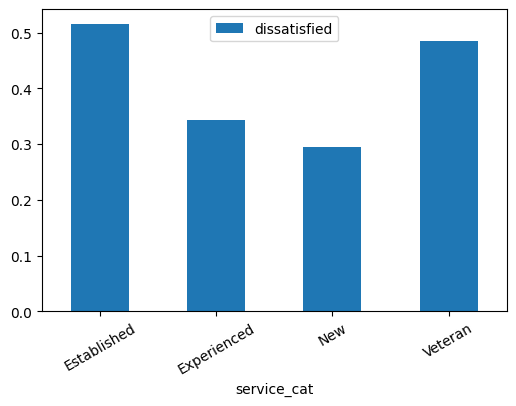

In [59]:

# Calculate the percentage of employees who resigned due to dissatisfaction in each category
dis_pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

# Plot the results
%matplotlib inline
dis_pct.plot(kind='bar', rot=30)
